<a href="https://colab.research.google.com/github/winckey/CS_study/blob/master/selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab 버전

# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium==4.1.5

Executing: /tmp/apt-key-gpghome.YHmhQuulyY/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.dDf6krzPbs/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.MBjNaoRXPn/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu

# 0.사전준비

## 0-1.실습에 필요한 라이브러리(코드묶음) 설치

In [ ]:
#인터넷을 구동시키는 라이브러리 설치
!pip install selenium==4.1.5
import selenium
selenium.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'4.1.5'

In [ ]:
##워드클라우드를 만드는 라이브러리
!pip install wordcloud==1.8.1
### 윈도우 키 > prompt 검색 > anaconda prompt 클릭 > 아래의 코드 입력
### !conda install -c conda-forge wordcloud=1.8.1
import wordcloud
wordcloud.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 KB 17.4 MB/s eta 0:00:00
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


'1.8.1'

In [ ]:
# #실습에 필요한 라이브러리 가져오기(추후 설명 예정)

# #PC버전
# import urllib.request
# url = "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"
# savename = "BMJUA_ttf.ttf"
# urllib.request.urlretrieve(url, savename)
# print("저장되었습니다..!")

# from selenium import webdriver 
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By
# service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')
# driver = webdriver.Chrome(service=service)

In [ ]:

#colab버전

#필요자료다운로드
#colab 환경을 만들기 위한 작업 (이해못해도 괜찮아요)

# 폰트설치 NanumBarunGothic 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 배민JUA체
!wget "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"

# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

#현재 보고 있는 화면의 스크린샷을 볼 수 있는 함수
def now_shot(driver):
  screenshot = driver.get_screenshot_as_png()
  img = Image.open(io.BytesIO(screenshot))
  return img

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (38.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


@기본 웹 브라우저 크롬으로 설정

## 0-2.함께 만들어 볼 프로그램 One Code 체험
1. 인터넷에 있는 특정단어("반도체")와 관련된 기사의 제목을 가져온다.
2. 가져온 기사를 엑셀 한 시트로 만든다.
3. 가져온 기사 제목을 모아서 워드클라우드로 제작한다.
4. 제작된 이미지를 원하는 곳으로 전송한다.

In [ ]:
#0- 코드사이를 기다려주는 기능
import time
st = 1 #5초를 기다린단

#1-1 인터넷을 킨다.
from selenium import webdriver
#PC버전
# driver = webdriver.Chrome(service=service)
#colab버전
# driver = webdriver.Chrome('chromedriver', options=options)

time.sleep(st)
#1-2.네이버에 접속한다.
driver.get("https://www.naver.com")

time.sleep(st)
#1-3.원하는 키워드를 검색한다.
greenbox = driver.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/div/input")
greenbox.send_keys("반도체")
driver.find_element(By.CLASS_NAME,"ico_search_submit").click()

time.sleep(st)
#1-4.반도체 검색>뉴스 링크를 바로 접속한다.(+ 최신순)
driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4")

time.sleep(st)
#1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
first_sel = driver.find_element(By.CLASS_NAME,"list_news")
second_sel = first_sel.find_elements(By.TAG_NAME,"li")
news_title_lists = []
for a in second_sel:
    news_title_lists.append(a.text.replace("\n",""))
print("----------------------------------추출한 텍스트는? -----------------------------------------")
print(news_title_lists)

time.sleep(st)
#2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.
import pandas as pd #pandas 라이브러리를 가져온다.
df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
df.to_excel('bhyunco_test.xlsx')

time.sleep(st)
#3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) #불용어 지정 (조사등)
wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
# wc = WordCloud(font_path="NanumBarunGothic",stopwords=stopwords) #wc 변수에 wordcloud 객체지정(colab용)
wc.generate(str(news_title_lists))
wc.to_file('wordcloud_bm.png')

----------------------------------추출한 텍스트는? -----------------------------------------
["문서 저장하기뉴시스언론사 선정7시간 전네이버뉴스용인 반도체클러스터 핵심 기반시설 2027년 준공 목표기사내용 요약 반도체 첫 공장 가동, 차질 없이 진행 중 경기 용인시는 전력과 용수 등 반도체 클러스터의 핵심기반시설에 대한 공사가 오는 2027년 상반기 첫 팹(Fab) 가동을 목표로 추진 중이라고 14일 밝혔다. 현재...연합뉴스6시간 전네이버뉴스용인 반도체 클러스터 기반시설 공사 '순조'…전력 공정률 17%KBS3시간 전네이버뉴스용인 반도체 클러스터 기반시설 공사 ‘순조’…전력 공정률 17%머니S3시간 전네이버뉴스용인 반도체클러스터 핵심 기반시설 조성 '본격화'아시아경제8시간 전네이버뉴스'120조' 용인반도체클러스터 전력·용수 등 기반시설공사 '순항'관련뉴스 12건 전체보기", "연합뉴스6시간 전네이버뉴스용인 반도체 클러스터 기반시설 공사 '순조'…전력 공정률 17%", 'KBS3시간 전네이버뉴스용인 반도체 클러스터 기반시설 공사 ‘순조’…전력 공정률 17%', "머니S3시간 전네이버뉴스용인 반도체클러스터 핵심 기반시설 조성 '본격화'", "아시아경제8시간 전네이버뉴스'120조' 용인반도체클러스터 전력·용수 등 기반시설공사 '순항'", '문서 저장하기ZDNet Korea5시간 전네이버뉴스작년 세계 반도체 웨이퍼 147억in² 출하 \'역대 최다\'지난해 세계에서 출하된 반도체 실리콘 원판(Wafer·웨이퍼) 면적이 역대 가장 많았던 것으로 나타났다. 국제반도체장비재료협회(SEMI)는 지난해 세계에서 출하된 실리콘 웨이퍼 면적이 147억1천300만 제곱인치...이투데이7시간 전작년 반도체 핵심 재료 웨이퍼 출하량 ‘역대 최대’...전년比 3.9% ↑뉴시스언론사 선정7시간 전네이버뉴스SEMI "반도체 핵심 소재 웨이퍼, 작년 출하량 역대 최고"', '이투데이7시간 전작년 반도체 핵심 재료 웨이퍼 출하량 ‘

In [ ]:
# 약식수업
# 1) 인터넷 열기 - driver = webdriver.Chrome('~~')
# 2) 원하는 주소 접속 - driver.get('~~~')
# 3) 원하는 위치 찾기 - first_sel = driver.find_element(By.~~~,'~~~')
# 4) 원하는 위치에 데이터 넣기 - first_sel.send_keys('~~~~')
# 5) 원하는 위치클릭하기 - first_sel.click()
# 6) 데이터 가져오기
  # first_sel.text
  # first_sel.get_attribute('innerHTML')
# 7) 연속동작

# 1.인터넷으로 해결할 수 있는 업무

- 인터넷 제어
- 인터넷 정보 획득

In [ ]:
#사례1) 거래가능고객정보 획득
#사례2) 키워드분석 통계 키워드분석
#사례3) 인트라넷 이메일 정리기능
#무엇이든 원한다면.. 모두할수있다.

# 2.selenium 기본

## 2-1.selenium 설치 및 라이브러리 가져오기

In [ ]:
# selenium 라이브러리를 인터넷에서 가져오기
# !pip install selenium #기본최신본설치
!pip install selenium==4.1.5
# selenium 4.1.5 버전 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#write your code (백견이 불여일타)

## 2-2.웹브라우저 드라이버 설치 (크롬 기본)

### PC버전

In [ ]:

# # pc버전

# #크롬드라이버 자동 설치 (selenium 4.0 버전이후)
# !pip install selenium==4.1.5
# !pip install webdriver_manager

# import selenium
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# service = Service(executable_path=ChromeDriverManager().install()) #크론드라이버 설치
# driver = webdriver.Chrome(service = service)

### Colab버전

In [ ]:
#colab버전
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [ ]:
#write your code (백견이 일여불타)

## 2-3.인터넷 열기

### pc버전

In [ ]:
# #pc버전
# driver = webdriver.Chrome(service=service) #드라이브 켜기
# driver.get('http://www.naver.com')

### colab 버전

In [ ]:
#colab 버전
driver = webdriver.Chrome('chromedriver', options=options)
driver.get('http://www.naver.com')

In [ ]:
#write your code (백견이 불여일타)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/104.0.5112.101 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url
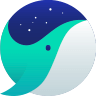
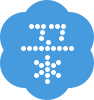

In [ ]:
#네이버의 메인제목 텍스트 가져오기(따라서 처보기)
driver.page_source

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#네이버의 특정 부분 텍스트 가져오기(보기만하기)
driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[2]').text

'메일\n카페\n블로그\n지식iN\n쇼핑\n쇼핑LIVE\nPay\nTV\n사전\n뉴스\n증권\n부동산\n지도\nVIBE\n도서\n웹툰\n더보기\n26.0°맑음(낮)\n31.0°31.0°\n도쿄'

In [ ]:
#write your code (백견이 불여일타)

## 2-4.요소(element)란?

https://ko.wikipedia.org/wiki/HTML_%EC%9A%94%EC%86%8C

-> 우리가 보는 HTML 을 구성하고 있는 단위<br>
-> 모든 HTML 구조의 마지막 자손 1개를 요소라고 명명할 수 있음<br>
-> 아버지 요소에는 아들요소들이 모두 함께 들어감<br>
-> 할어버지 요소에는 아버지,아들 요소들이 모두 함께 들어감<br>
https://codepen.io/bhyunco/pen/VwpXYvP

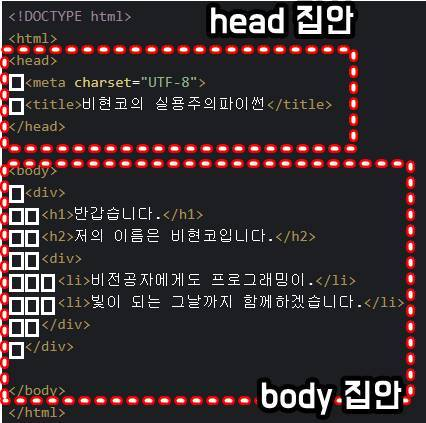

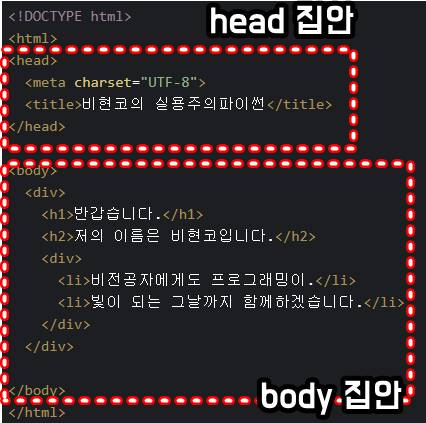

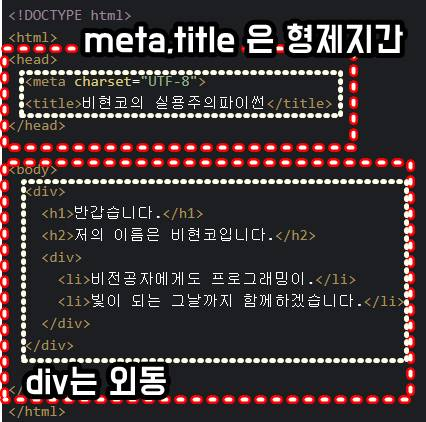


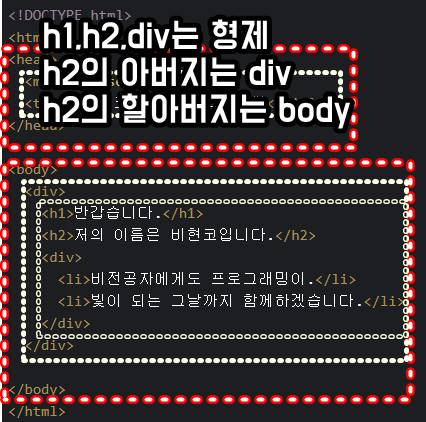


In [ ]:
# F12 를 켜고, HTML 코드를 분석해보자


### 2-4-1.요소찾기(find_element-------)

In [ ]:
# class , tag , id ,xpath  등을 통한 찾기
driver.get("https://www.google.com//?hl=")
#1순위 id
id_sel = driver.find_element(By.ID,'gb') 
print(id_sel.text) #print 출력의 의미

GmailImages
Sign in


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#2순위 class,tag 등
class_sel = driver.find_element(By.CLASS_NAME,'gb_7d.gb_f.gb_lg.gb_cg')
print(class_sel.text)

GmailImages


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#3순위(최후의 보루) xpath
xpath_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[1]/div/div/div")
print(xpath_sel.text)

GmailImages
Sign in


In [ ]:
#write your code (백견이 불여일타)

### 2-4-2.요소 데이터 한개 가져오기 - 가장먼저나오는 요소선택
driver.find_element(By.CLASS_NAME,"")<br>
driver.find_element(By.ID,"")<br>
driver.find_element(By.TAG_NAME,"")<br>
driver.find_element(By.XPATH,"")

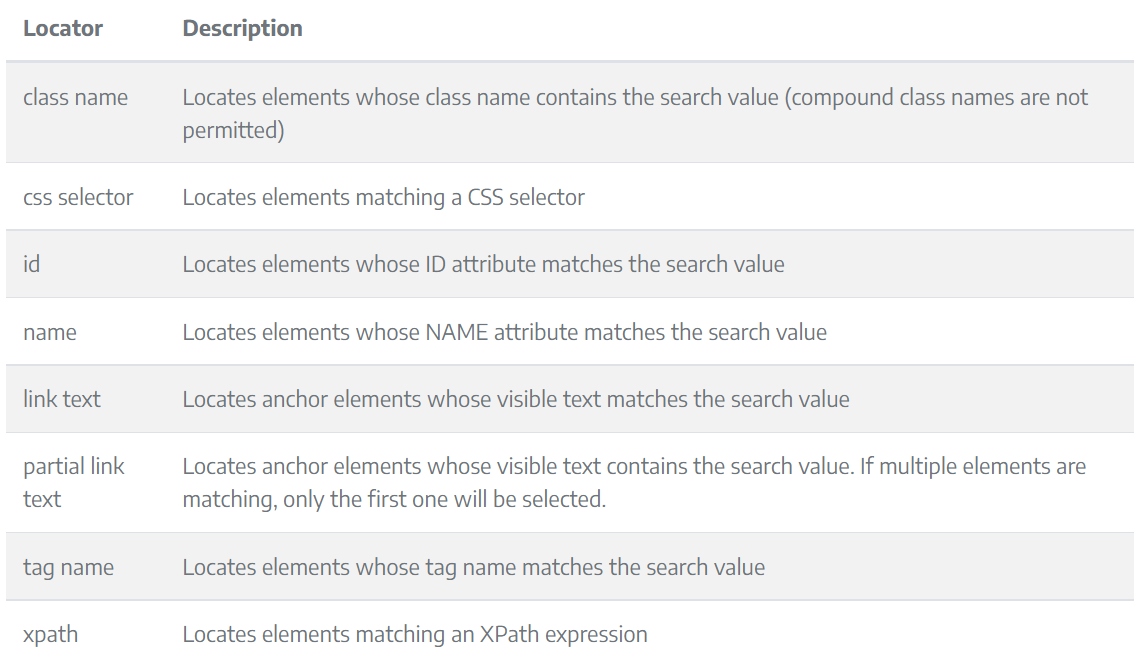

In [ ]:
 # 실행하지 말고, 자동완성 기능인 Shift+Tap or Tap을 눌러보기
 # driver.find_element(By.)


'<div class="o3j99 n1xJcf Ne6nSd"><style data-iml="1662341290563">.Ne6nSd{display:flex;align-items:center;padding:6px}a.MV3Tnb{display:inline-block;padding:5px;margin:0 5px;color:#202124}a.MV3Tnb:first-of-type{margin-left:15px}.LX3sZb{display:inline-block;flex-grow:1}</style><a class="MV3Tnb" href="https://about.google/?fg=1&amp;utm_source=google-US&amp;utm_medium=referral&amp;utm_campaign=hp-header" data-jsarwt="1" data-usg="AOvVaw13L0SpN0L7ycx9R0_i4R2S" data-ved="0ahUKEwjd4u7wv_z5AhVkMlkFHV_KCxIQkNQCCAI">About</a><a class="MV3Tnb" href="https://store.google.com/US?utm_source=hp_header&amp;utm_medium=google_ooo&amp;utm_campaign=GS100042&amp;hl=en-US" data-jsarwt="1" data-usg="AOvVaw0wvkRBURf91YdMQCXOelDf" data-ved="0ahUKEwjd4u7wv_z5AhVkMlkFHV_KCxIQpMwCCAM">Store</a><div class="LX3sZb"><div class="gb_oa gb_Xd gb_1a gb_Pd" id="gb"><div class="gb_Vd gb_Xa gb_Kd" data-ogsr-up=""><div><div class="gb_7d gb_f gb_lg gb_cg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href
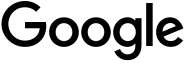

In [ ]:
#div 태그 가져오기
div_sel = driver.find_element(By.TAG_NAME,'div')
div_sel.get_attribute('innerHTML')

In [ ]:
#write your code (백견이 불여일타)


### 2-4-3. 요소 데이터 여러개 가져오기
driver.find_elements(By.CLASS_NAME,"")<br>
driver.find_elements(By.ID,"")<br>
driver.find_elements(By.TAG_NAME,"")<br>
driver.find_elements(By.XPATH,"")

In [ ]:
#div 태그 모두 가져오기
div_sels = driver.find_elements(By.TAG_NAME,'div')
print(len(div_sels))
div_sels[2].get_attribute('innerHTML')

100


'<div class="gb_oa gb_Xd gb_1a gb_Pd" id="gb"><div class="gb_Vd gb_Xa gb_Kd" data-ogsr-up=""><div><div class="gb_7d gb_f gb_lg gb_cg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href="https://mail.google.com/mail/&amp;ogbl" target="_top">Gmail</a></div><div class="gb_e gb_f"><a class="gb_d" data-pid="2" href="https://www.google.com/imghp?hl=en&amp;ogbl" target="_top">Images</a></div></div></div><div class="gb_Re"><div class="gb_Sc"><div class="gb_z gb_gd gb_f gb_zf" data-ogsr-fb="true" data-ogsr-alt="" id="gbwa"><div class="gb_yf"><a class="gb_A" aria-label="Google apps" href="https://www.google.com/intl/en/about/products" aria-expanded="false" role="button" tabindex="0"><svg class="gb_Ue" focusable="false" viewBox="0 0 24 24"><path d="M6,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.

In [ ]:
#write your code (백견이 불여일타)


### 2-4-4.요소 데이터 넣기(send_Keys)

In [ ]:
# #타이핑치기(PC에서 작동안함)
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# driver.get('http://www.google.com/?hl=')
# input_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
# input_sel.send_keys("비현코\n")


#타이핑치기(colab에서 작동함)
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver.get('http://www.naver.com')
input_sel = driver.find_element(By.ID,"query")
input_sel.send_keys("비현코\n")

In [ ]:
#write your code (백견이 불여일타)

### 2-4-5.요소 클릭(click)

In [ ]:
#클릭1 _ selenium 클릭
driver.get('http://www.google.com/?hl=')
click_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[3]/center/input[2]")
click_sel.click()

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#클릭2 - 키보드 엔터
driver.get('http://www.google.com/?hl=')
from selenium.webdriver.common.keys import Keys
#참고 https://www.selenium.dev/documentation/webdriver/keyboard/#sendkeys
click_sel = driver.find_element(By.CLASS_NAME,"MV3Tnb")
click_sel.send_keys(Keys.ENTER)

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#클릭3 - 자바스크립트를 이용
driver.get('http://www.google.com/?hl=')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')
# element.click()
# element.send_keys(Keys.ENTER)
driver.execute_script("arguments[0].click();", element)

In [ ]:
#write your code (백견이 불여일타)

### 2-4-6.요소 출력

In [ ]:
# 뉴스 제목, 링크, 요약 찾아서 출력하기
driver.get('http://www.google.com/?hl=')
html_sel = driver.find_element(By.CLASS_NAME,"o3j99.n1xJcf.Ne6nSd")
#요소의 텍스트를 출력
print(html_sel.text)
#요소의 하위 Html 코드를 모두출력
html_sel.get_attribute('innerHTML')

About
Store
GmailImages
Sign in


'<style data-iml="1662341301541">.Ne6nSd{display:flex;align-items:center;padding:6px}a.MV3Tnb{display:inline-block;padding:5px;margin:0 5px;color:#202124}a.MV3Tnb:first-of-type{margin-left:15px}.LX3sZb{display:inline-block;flex-grow:1}</style><a class="MV3Tnb" href="https://about.google/?fg=1&amp;utm_source=google-US&amp;utm_medium=referral&amp;utm_campaign=hp-header" data-jsarwt="1" data-usg="AOvVaw13L0SpN0L7ycx9R0_i4R2S" data-ved="0ahUKEwjW8ov2v_z5AhWmM1kFHdaADacQkNQCCAI">About</a><a class="MV3Tnb" href="https://store.google.com/US?utm_source=hp_header&amp;utm_medium=google_ooo&amp;utm_campaign=GS100042&amp;hl=en-US" data-jsarwt="1" data-usg="AOvVaw0wvkRBURf91YdMQCXOelDf" data-ved="0ahUKEwjW8ov2v_z5AhWmM1kFHdaADacQpMwCCAM">Store</a><div class="LX3sZb"><div class="gb_oa gb_Xd gb_1a gb_Pd" id="gb"><div class="gb_Vd gb_Xa gb_Kd" data-ogsr-up=""><div><div class="gb_7d gb_f gb_lg gb_cg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href="https://mail.google.com/mail/&a

In [ ]:
#write your code (백견이 불여일타)

### 2-4-7.연속동작

In [ ]:
#기다림없이 진행
import time
import math

start = time.time()
driver.get('https://www.google.com/?hl=')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')
driver.execute_script("arguments[0].click();", element)
end = time.time()
print(f"{end - start:.5f} sec")

1.15140 sec


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#시간기다리기 (지정시간)

start = time.time()
driver.get('https://www.google.com/?hl=')
print('5초 뒤 시작')

time.sleep(5)

print('시작')

element = driver.find_element(By.CLASS_NAME,'RNmpXc')

driver.execute_script("arguments[0].click();", element)

end = time.time()
print(f"{end - start:.5f} sec")

5초 뒤 시작
시작
6.08187 sec


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#시간기다리기 (로딩될때까지 기다리기)
start = time.time()
driver.implicitly_wait(time_to_wait=5)
print('5초까지 기다릴수잇음')

driver.get('https://www.google.com/?hl=')

print('시작')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')

driver.execute_script("arguments[0].click();", element)
end = time.time()
print(f"{end - start:.5f} sec")

5초까지 기다릴수잇음
시작
0.60438 sec


In [ ]:
#write your code (백견이 불여일타)

# 3.현업문제해결

## 3-1.상황설정

1. 인터넷에 있는 특정단어("반도체")와 관련된 기사의 제목을 가져온다.
2. 가져온 기사를 엑셀 한 시트로 만든다.
3. 가져온 기사 제목을 모아서 워드클라우드로 제작한다.
4. 제작된 이미지를 원하는 곳으로 전송한다.


* 주의 - 모든 코딩과정을 이해하고 따라오기에는 시간이 걸립니다.
그런 시간을 견디지 못하고 많은 비전공자분들이 코딩의 문턱을 넘지 못합니다.
각자의 학습스타일에 따라 다르겠지만,
이해하기보다는 "아~ 이렇게 쓰는구나!" 라고 생각하고 학습에 임해주세요.

마치, 우리가 엑셀의 vlookup,if등의 함수를 쓸 때,
하나하나 제작된 원리를 이해해서 하기보다는 자주 쓰다보니 외어지는 것 처럼 말이죠!

(제가 경험했던 가장 큰 실수는 모든 것을 이해하고 다음으로 넘어가려했기 때문입니다. 일단 기능에만 충실해주세요)

### 1단계-인터넷에 있는 특정단어와 관련된 기사 100개를 가져온다.(직접코딩)

In [ ]:
#1-1.인터넷에 접속한다
!pip install selenium==4.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### PC용

In [ ]:
# #실습에 필요한 라이브러리가 가져오기(추후 설명 예정)
# #PC버전
# from selenium import webdriver 
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By
# service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')

# driver = webdriver.Chrome(service=service) #드라이브 켜기


### COLAB용

In [ ]:
# #colab 버전
driver = webdriver.Chrome('chromedriver', options=options)

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [ ]:
#1-2.네이버에 접속한다.
driver.get("https://www.naver.com")

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [ ]:
#1-3.원하는 키워드를 검색한다.
greenbox = driver.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/div/input")
greenbox.send_keys("반도체")
driver.find_element(By.CLASS_NAME,"ico_search_submit").click()

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [ ]:
#1-4.뉴스탭을 클릭한다(+ 최신순)
#유튜브의 뉴스탭만 클릭하고 싶으면?  driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=반도체")
driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4")

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [ ]:
#1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
type(driver.find_elements(By.CLASS_NAME,"list_news"))
first_sel = driver.find_element(By.CLASS_NAME,"list_news")
second_sel = first_sel.find_elements(By.TAG_NAME,"li")
news_title_lists = []
for a in second_sel:
    news_title_lists.append(a.text.replace("\n",""))
news_title_lists

['문서 저장하기YTN언론사 선정4시간 전네이버뉴스미국도 中 반도체시장 딜레마...美 업계 \'중국 시장 얼마짜린데\'만든 \'반도체 법\'도 우리 기업에 양날의 칼이 될 거란 우려가 나옵니다. 미국에 공장을 지으면 대규모 혜택을 주는 대신 중국에는 등을 돌려야 한다는 조건 때문인데, 미국 반도체 업계마저 이 같은 조건에 우려를 표시하고...동영상MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"관련뉴스 14건 전체보기',
 'MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"',
 '세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”',
 '연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"',
 '연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"',
 '문서 저장하기뉴시스언론사 선정4시간 전네이버뉴스반도체 전문가들, "반도체 위기…내년에도 지속된다"기사내용 요약 전문가 96.7% "반도체 산업, 위기 직전이거나 현재 위기" "정부, 적극적이고 세련된 외교·특단의 제도 개선 등 필요" [서울=뉴시스] 이인준 기자 = 반도체 전문가 10명 중 7명은 최근 우리 기업을...아시아경제언론사 선정4시간 전네이버뉴스전문가 10명 중 6명 “반도체 산업 위기…내후년에도 지속”ZDNet Korea언론사 선정4시간 전네이버뉴스반도체 전문가 60% "반도체 산업 내후년에도 위기"헤럴드경제언론사 선정4시간 전네이버뉴스“한국 반도체 최근 10년 중 가장 심각” 尹정부 초강대국 전략 ‘비상’연합뉴스2시간 전네이버뉴스전문가 10명

In [ ]:
#write your code (100견이 불여일타)

## 2단계-가져온 기사를 엑셀 한 시트로 만든다. (직접코딩)

In [ ]:
#2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.

import pandas as pd #pandas 라이브러리를 가져온다.
df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
df.to_excel('bhyunco_test.xlsx')

In [ ]:
#write your code (100견이 불여일타)

## 3단계-가져온 기사 제목을 워드클라우드로 제작한다.(코드활용)

In [ ]:
news_title_lists

['문서 저장하기YTN언론사 선정4시간 전네이버뉴스미국도 中 반도체시장 딜레마...美 업계 \'중국 시장 얼마짜린데\'만든 \'반도체 법\'도 우리 기업에 양날의 칼이 될 거란 우려가 나옵니다. 미국에 공장을 지으면 대규모 혜택을 주는 대신 중국에는 등을 돌려야 한다는 조건 때문인데, 미국 반도체 업계마저 이 같은 조건에 우려를 표시하고...동영상MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"관련뉴스 14건 전체보기',
 'MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"',
 '세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”',
 '연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"',
 '연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"',
 '문서 저장하기뉴시스언론사 선정4시간 전네이버뉴스반도체 전문가들, "반도체 위기…내년에도 지속된다"기사내용 요약 전문가 96.7% "반도체 산업, 위기 직전이거나 현재 위기" "정부, 적극적이고 세련된 외교·특단의 제도 개선 등 필요" [서울=뉴시스] 이인준 기자 = 반도체 전문가 10명 중 7명은 최근 우리 기업을...아시아경제언론사 선정4시간 전네이버뉴스전문가 10명 중 6명 “반도체 산업 위기…내후년에도 지속”ZDNet Korea언론사 선정4시간 전네이버뉴스반도체 전문가 60% "반도체 산업 내후년에도 위기"헤럴드경제언론사 선정4시간 전네이버뉴스“한국 반도체 최근 10년 중 가장 심각” 尹정부 초강대국 전략 ‘비상’연합뉴스2시간 전네이버뉴스전문가 10명

In [ ]:
#3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
!pip install wordcloud==1.8.1
# import sys
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) #불용어 지정 (조사등)
wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
wc.generate(str(news_title_lists))
wc.to_file('wordcloud.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#write your code (백견이 불여일타)

ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ

# 응용 (단어 10개 워드크라우드 만들기)

In [ ]:
keyword_list = ['반도체',
               'NFT',
               '블록체인',
               'DigitalTransformation',
               '4차산업혁명',
               '파이썬업무자동화',
               'AI',
               '머신러닝',
               '딥러닝',
               'NEXT'
               ]

In [ ]:
#시간기다리기 (로딩될때까지 기다리기최대 5초까지 기다리기)
driver.implicitly_wait(time_to_wait=5)
    #1-1 인터넷을 킨다.
from selenium import webdriver
##PC용
# driver = webdriver.Chrome(service=service)
##colab용
driver = webdriver.Chrome('chromedriver', options=options)

for keyword in keyword_list: 
    #0- 코드사이를 기다려주는 기능


    #1-2.네이버에 접속한다.
    driver.get("https://www.naver.com")

    #1-3.원하는 키워드를 검색한다.
    greenbox = driver.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/div/input")
    greenbox.send_keys(keyword)
    driver.find_element(By.CLASS_NAME,"ico_search_submit").click()

    #1-4.반도체 검색>뉴스 링크를 바로 접속한다.(+ 최신순)
    driver.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}")

    #1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
    first_sel = driver.find_element(By.CLASS_NAME,"list_news")
    second_sel = first_sel.find_elements(By.TAG_NAME,"li")
    news_title_lists = []
    for a in second_sel:
        news_title_lists.append(a.text.replace("\n",""))
    print("----------------------------------추출한 텍스트는? -----------------------------------------")
    print(news_title_lists)

    #2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.
    import pandas as pd #pandas 라이브러리를 가져온다.
    df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
    df.to_excel(f'bhyunco_test_{keyword}.xlsx')

    #3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
    from wordcloud import WordCloud, STOPWORDS
    stopwords = set(STOPWORDS) #불용어 지정 (조사등)
    wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
    wc.generate(str(news_title_lists))
    wc.to_file(f'wordcloud_{keyword}.png')



----------------------------------추출한 텍스트는? -----------------------------------------
['문서 저장하기YTN언론사 선정4시간 전네이버뉴스미국도 中 반도체시장 딜레마...美 업계 \'중국 시장 얼마짜린데\'만든 \'반도체 법\'도 우리 기업에 양날의 칼이 될 거란 우려가 나옵니다. 미국에 공장을 지으면 대규모 혜택을 주는 대신 중국에는 등을 돌려야 한다는 조건 때문인데, 미국 반도체 업계마저 이 같은 조건에 우려를 표시하고...동영상MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"관련뉴스 14건 전체보기', 'MBN언론사 선정2시간 전네이버뉴스미 반도체협회장 "전 세계 반도체 균형 다시 맞출 것"', '세계일보언론사 선정1시간 전네이버뉴스美 반도체협회장 “대중국 정책 수립 절묘한 균형 필요”', '연합뉴스4시간 전네이버뉴스[인터뷰] 美반도체협회장 "반도체법, 한미간 협력강화에 도움될 것"', '연합뉴스4시간 전네이버뉴스美반도체협회장 "칩4서 공급망·보조금·지재권 협력 논의 희망"', '문서 저장하기뉴시스언론사 선정4시간 전네이버뉴스반도체 전문가들, "반도체 위기…내년에도 지속된다"기사내용 요약 전문가 96.7% "반도체 산업, 위기 직전이거나 현재 위기" "정부, 적극적이고 세련된 외교·특단의 제도 개선 등 필요" [서울=뉴시스] 이인준 기자 = 반도체 전문가 10명 중 7명은 최근 우리 기업을...아시아경제언론사 선정4시간 전네이버뉴스전문가 10명 중 6명 “반도체 산업 위기…내후년에도 지속”ZDNet Korea언론사 선정4시간 전네이버뉴스반도체 전문가 60% "반도체 산업 내후년에도 위기"헤

# 4. 크롤링의 허용
크롤링의 허용 여부 체크 (싸이트명/robots.txt)  https://namu.wiki/w/robots.txt <br>
google에서 크롤링을 공식적으로 허용한 사이트 - https://www.google.com/search/howsearchworks/

In [ ]:
#싸이트에 접속
driver.get("https://www.google.com/search/howsearchworks/") # 문자열의 의미 / 메쏘드의 의미
#싸이트 HTML 코드 가져오기
driver.page_source 

'<html lang="en" class="ready"><head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>Google Search - Discover How Google Search Works</title>\n    <meta name="description" content="Wondering how Google Search works? Learn how Google looks through and organizes all the information on the internet to give you the most useful and relevant Search results in a fraction of a second.">\n    <link rel="canonical" href="https://www.google.com/search/howsearchworks/">\n    <meta name="referrer" content="no-referrer">\n    <link href="https://www.google.com/intl/ar/search/howsearchworks/" hreflang="ar" rel="alternate">\n    <link href="https://www.google.com/intl/bg/search/howsearchworks/" hreflang="bg" rel="alternate">\n    <link href="https://www.google.com/intl/ca-FR/search/howsearchworks/" hreflang="ca-fr" rel="alternate">\n    <link href="https://www.google.com/intl/cs/search/howsearchworks/" hreflang="cs" rel="alternate">\

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
## 크롤링의 허용
# 크롤링의 허용 여부 체크 (싸이트명/robots.txt)  https://namu.wiki/w/robots.txt <br>
# google에서 크롤링을 공식적으로 허용한 사이트 - https://www.google.com/search/howsearchworks/

#싸이트에 접속
driver.get("https://www.google.com/search/howsearchworks/") # 문자열의 의미 / 메쏘드의 의미
#싸이트 HTML 코드 가져오기
driver.page_source 

'<html lang="en" class="ready"><head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>Google Search - Discover How Google Search Works</title>\n    <meta name="description" content="Wondering how Google Search works? Learn how Google looks through and organizes all the information on the internet to give you the most useful and relevant Search results in a fraction of a second.">\n    <link rel="canonical" href="https://www.google.com/search/howsearchworks/">\n    <meta name="referrer" content="no-referrer">\n    <link href="https://www.google.com/intl/ar/search/howsearchworks/" hreflang="ar" rel="alternate">\n    <link href="https://www.google.com/intl/bg/search/howsearchworks/" hreflang="bg" rel="alternate">\n    <link href="https://www.google.com/intl/ca-FR/search/howsearchworks/" hreflang="ca-fr" rel="alternate">\n    <link href="https://www.google.com/intl/cs/search/howsearchworks/" hreflang="cs" rel="alternate">\

In [ ]:
#write your code (백견이 일여불타)